# Single Response Optimization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy.optimize import least_squares

In [2]:
# experimental data
tspan = np.array([0, 0.1, 0.2, 0.4, 0.8, 1])
Ca_data = np.array([2.0081,  1.5512,  1.1903,  0.7160,  0.2562,  0.1495])
Ca0 = Ca_data[0]

# 1st method (curve_fit)

The estimated value of rate constant is 2.588943185962723


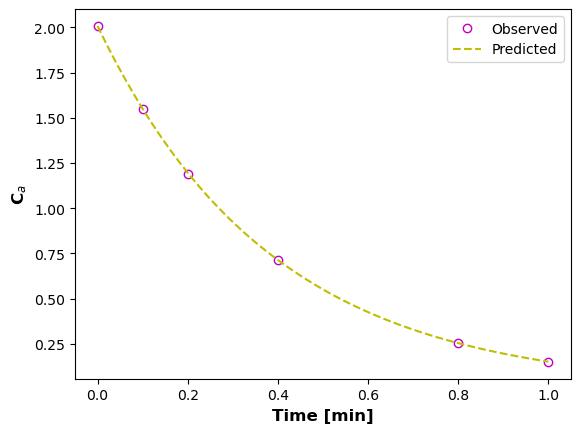

In [6]:
def myode(t, y, *params):
    
    k, = params
    
    Ca = y
    dca = -k*Ca
    
    return dca

def fitfunc(t, *params):
    
    k, = params

    sol_ode = solve_ivp(myode, (0, t[-1]), [Ca0], t_eval = t, args=(k,))

    return sol_ode.y[0]

# curve fit
params, kcov = curve_fit(fitfunc, tspan, Ca_data, p0 = 1.3)

# summarize the parameter values
k = params

# fine a sequence of inputs between the smallest and largest known inputs
tfit = np.linspace(min(tspan), max(tspan))

# calculate the output for the range
fit_y = fitfunc(tfit, k)

fig = plt.subplots(dpi = 100)
plt.plot(tspan, Ca_data, 'mo', mfc = 'None', label='Observed')
plt.plot(tfit, fit_y, 'y--', label='Predicted')
plt.legend(loc='best')
plt.xlabel('Time [min]', fontsize=12, fontweight='bold')
plt.ylabel('C$_a$', fontsize=12, fontweight='bold')

print('The estimated value of rate constant is', k[0])

# 2nd (minimize)

The estimated value of rate constant is 2.5899936560481516


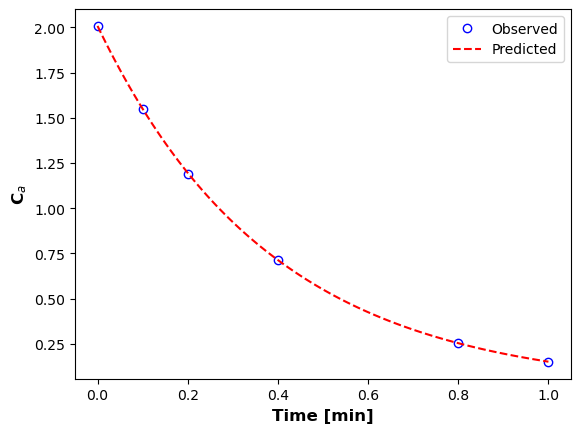

In [4]:
def myode(t, y, *params):
    
    k, = params
    
    Ca = y
    dca = -k*Ca
    
    return dca

# y stands for initial values of response variable
# t stands for the independent variable
def regression_fun(t, y, *params):
    
    k, = params
    ode_sol = solve_ivp(myode, (0, t[-1]), [y[0]], t_eval = t, args=(k,))
    
    return ode_sol.y

def min_fun(params, t, y):
    
    y_pred = regression_fun(t, y, *params)
    
    errFun = y_pred - y

    return (errFun**2).sum()

# args = (experimental values)
res_min = minimize(min_fun, 
               [1.3], # initial value of k
               args=(tspan, Ca_data), 
               method='SLSQP',
               bounds=[(0.0, np.inf)])

k = res_min.x

tfit = np.linspace(min(tspan), max(tspan), 100)

ode_sol = solve_ivp(myode, 
                    (0., tfit[-1]), 
                    [Ca0], 
                    t_eval = tfit, 
                    args=(k,))

y_pred = ode_sol.y[0,:]

plt.plot(tspan, Ca_data, "bo", mfc = 'None', label = 'Observed')
plt.plot(tfit, y_pred, "r--", label = 'Predicted')
plt.legend(loc='best')
plt.xlabel('Time [min]', fontsize=12, fontweight='bold')
plt.ylabel('C$_a$', fontsize=12, fontweight='bold')

print('The estimated value of rate constant is', k[0])

# 3rd (least squares)

The estimated value of rate constant is 2.5889197732081324


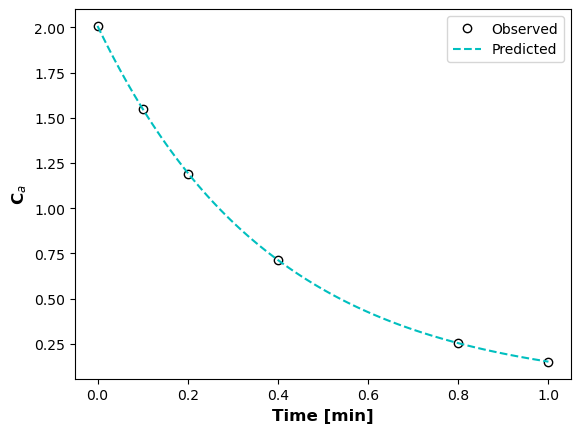

In [5]:
def myode(t, y, k):
    
    Ca = y
    dcadt = -k*Ca
    
    return dcadt

def y_calc(t, y, *params):
    
    k, = params
    ode_sol = solve_ivp(myode, (0, t[-1]), [y[0]], t_eval = t, args=(k,))
    
    return ode_sol.y

def min_fun(params, t, y):
    
    y_pred = y_calc(t, y, *params)
    
    errFun = y_pred - y

    return (errFun**2).sum()

# least_squares
res_lsq = least_squares(min_fun, 
                        [2.5], 
                        bounds = (0.0, np.inf), 
                        args = (tspan, Ca_data))

k = res_lsq.x

tfit = np.linspace(min(tspan), max(tspan), 100)

ode_sol = solve_ivp(myode, 
                    (0., tfit[-1]), 
                    [Ca0], 
                    t_eval = tfit, 
                    args=(k,))

y_pred = ode_sol.y[0,:]

plt.plot(tspan, Ca_data, "ko", mfc = 'None', label = 'Observed')
plt.plot(tfit, y_pred, "c--", label = 'Predicted')
plt.legend(loc='best')
plt.xlabel('Time [min]', fontsize=12, fontweight='bold')
plt.ylabel('C$_a$', fontsize=12, fontweight='bold')

print('The estimated value of rate constant is', k[0])